In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

%matplotlib inline
%config InlineBackend.figure_format='retina'
#!pip install git+https://github.com/M-Bianchi/My_matplotlib_style
plt.style.use('mystyle')

### 2. Kicking horses

A famous early  application of low-number statistics was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898.

He studied the distribution of 122 men kicked to death by horses among 10 Prussian army corps within 20 years (so a total number of corpes of 200). He recorded the number of corps with a given number of deaths:

| Number of deaths | Number of groups |
| --- | --- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

- Plot the resulting probability distribution. Careful with the normalization
- How does it look like? Again try to fit it by hand.

(Hint: think about sample mean and sample variance)


# Code

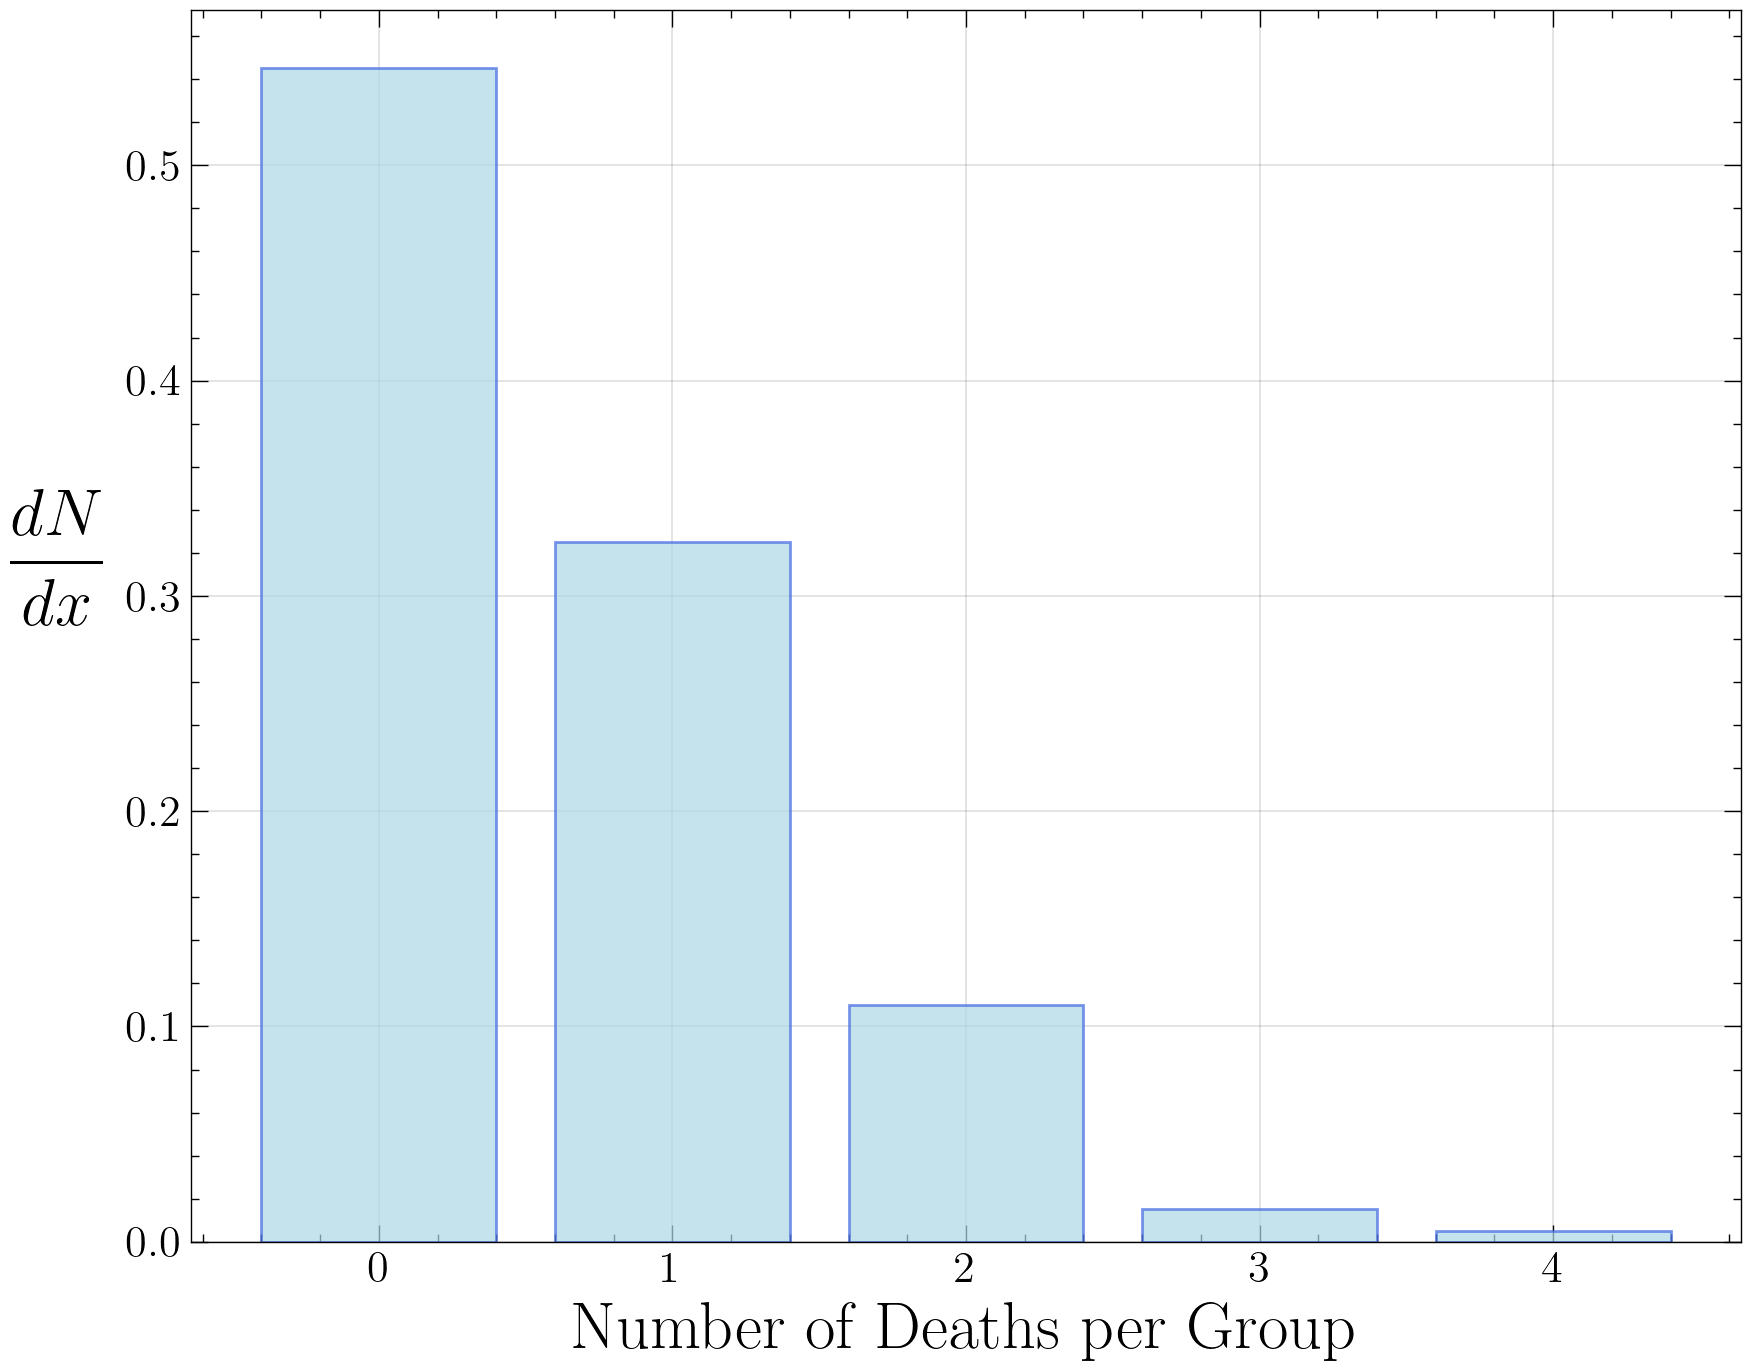

In [2]:
labels = np.array([0, 1, 2, 3, 4])
counts = np.array([109, 65, 22, 3, 1])
counts = counts/np.sum(counts) #Normalization

plt.bar(labels, counts, fc='lightblue', ec='royalblue', alpha=0.7)
plt.xlabel('Number of Deaths per Group')
plt.ylabel('$\\dfrac{dN}{dx}$', rotation=0, labelpad=25);

We want to fit the data with a Poisson model

In [3]:
results = curve_fit(stats.poisson.pmf, labels, counts, [1])
results

(array([0.60842452]), array([[9.7770837e-05]]))

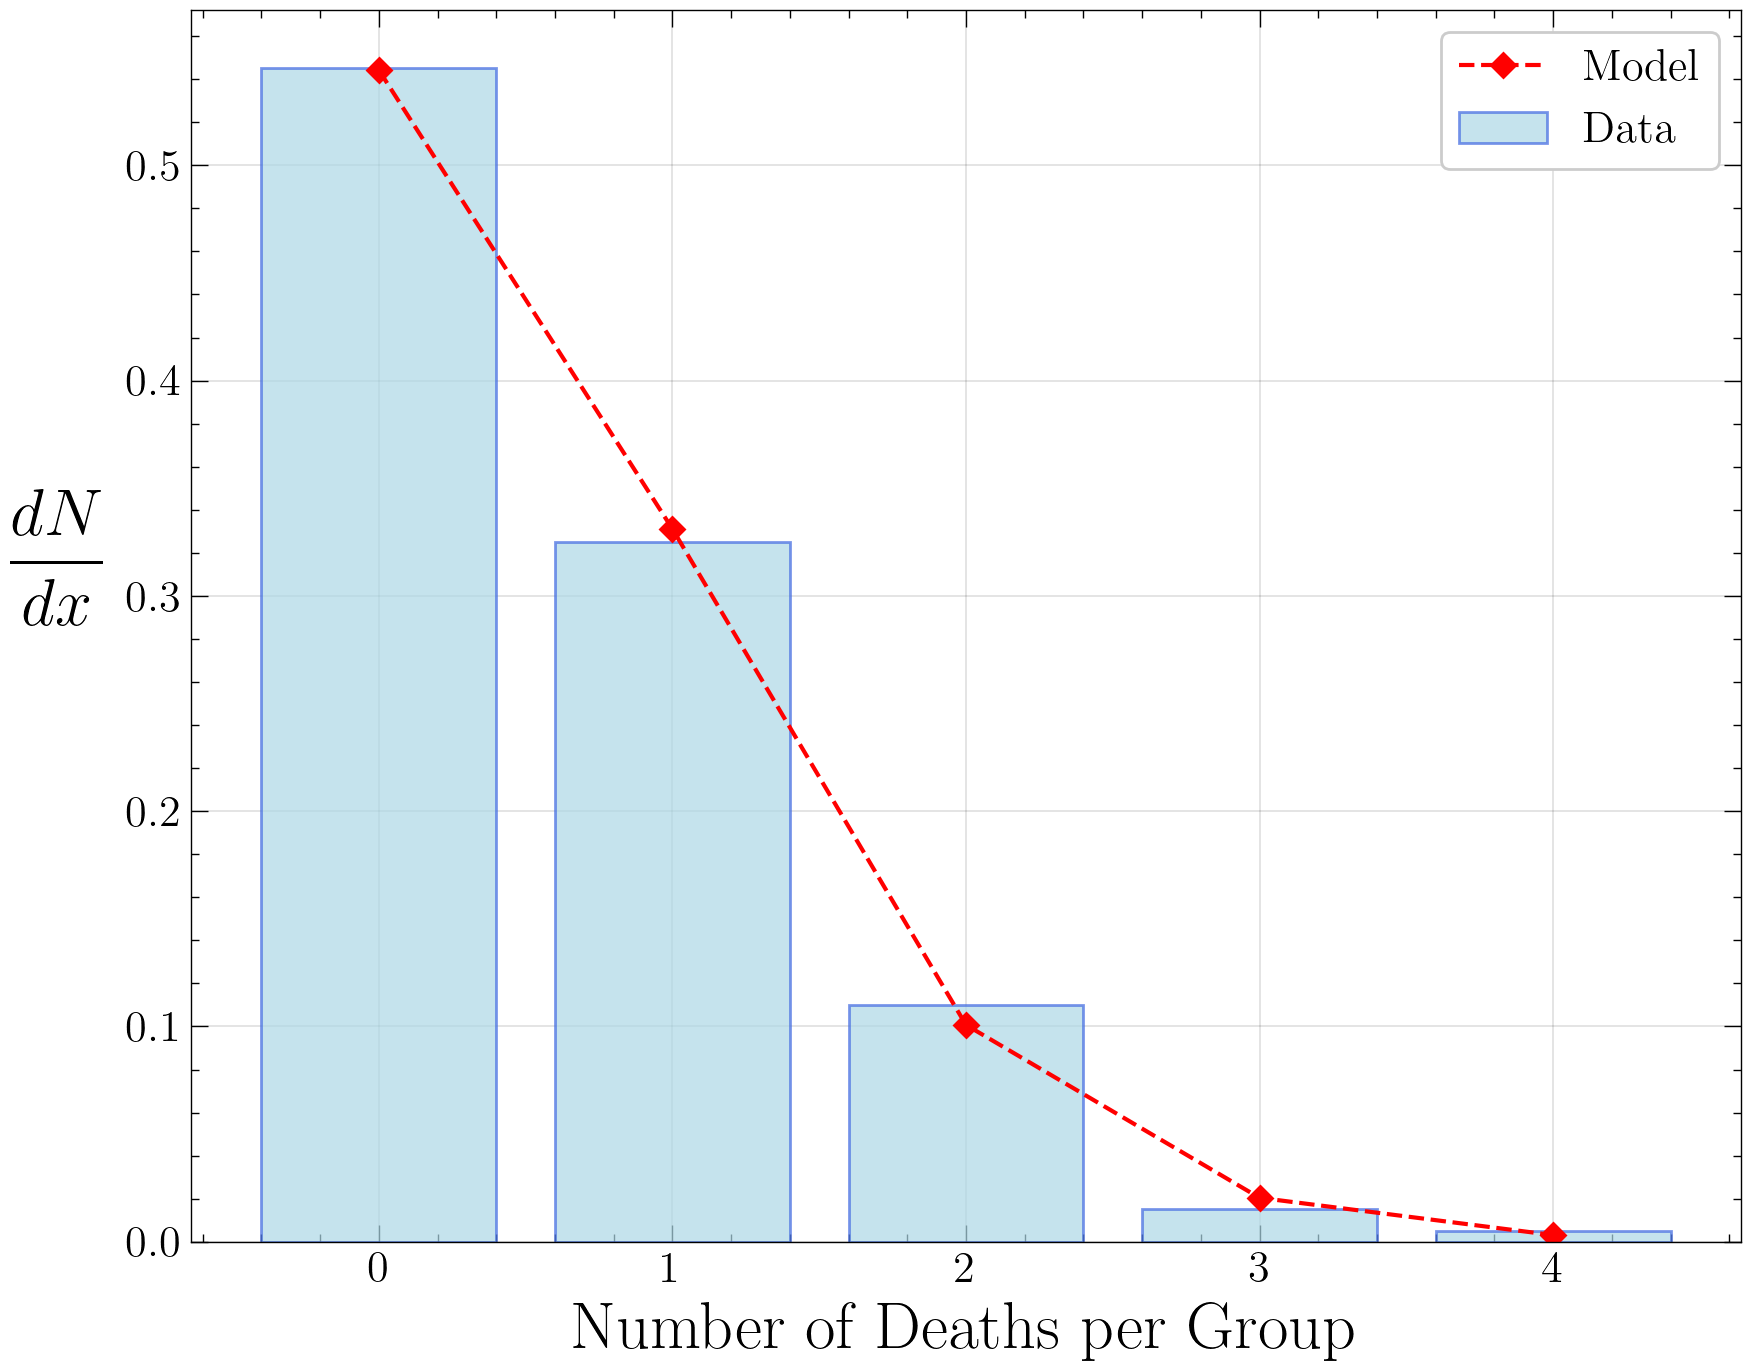

In [4]:
#Bar Plot
plt.bar(labels, counts, fc='lightblue', ec='royalblue', alpha=0.7, label='Data')
plt.xlabel('Number of Deaths per Group')
plt.ylabel('$\\dfrac{dN}{dx}$', rotation=0, labelpad=25)

#Fit
plt.plot(labels, stats.poisson.pmf(labels, results[0]), marker='D', linestyle='--', color='red', label='Model')
plt.legend();